<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Bibliotecas_Python_V2_Numpy%2C_Pandas_e_Matplot_%5BValdir%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A utilização dos dados para analisar a estrutura do RH e os perfis dos colaboradores de uma empresa é algo essencial nos dias atuais com o advendo da tecnologia. Traçar um perfil ou entender como é o quadro de funcionários se tornou algo muito mais fácil com a utilização de ferramentas como excel, power bi e python. Neste contexto, você utilizando o dataset [Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set), e o glossário de todos as variáveis está disponível no [Codebook](https://rpubs.com/rhuebner/hrd_cb_v14), você dee responder as 10 perguntas para praticar os conceitos adquiridos nas aulas sobre bibliotecas e para aprender funções ou conceitos novos.
- 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
- 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).
- 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)
- 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)
- 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)
- 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?
- 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)
- 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?
- 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position
- 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?


## Import e seleção dos dados

In [28]:
#-- Importação de bibliotecas e dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#-- Import via colab
# from google.colab import files
# files.upload()
# df = pd.read_csv('/content/HRDataset_v14.csv')

#-- Import via drive
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dnc/Dataset/HRDataset_v14.csv')




## 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
Resposta: 311

In [ ]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
hrd = pd.read_csv('/content/drive/MyDrive/ARQUIVOS-DNC/HRDataset_v14.csv')

In [ ]:
print(hrd.shape)
hrd.head(0)

(311, 36)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [4]:
# Resposta 1 com Pandas
hrd.duplicated()
hrd1 = list(hrd['Employee_Name'].duplicated())
hrd1.count(False)

311

In [5]:
# Resposta 1 com Numpy
hrd2 = list(hrd['EmpID'])
hr3 = np.unique(hrd2)
hr3.size

311

## 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).

In [6]:
col = hrd.filter(items=['State','Employee_Name'])
print(col)
col1 = list(hrd['State']=='MA')
col1.count(True)

    State             Employee_Name
0      MA       Adinolfi, Wilson  K
1      MA  Ait Sidi, Karthikeyan   
2      MA         Akinkuolie, Sarah
3      MA              Alagbe,Trina
4      MA          Anderson, Carol 
..    ...                       ...
306    MA            Woodson, Jason
307    MA        Ybarra, Catherine 
308    MA          Zamora, Jennifer
309    MA               Zhou, Julia
310    MA             Zima, Colleen

[311 rows x 2 columns]


276

In [7]:
valor = col.groupby('State').size().reset_index(name='qtd')

valor['Percentual'] = (valor['qtd'] / valor['qtd'].sum()) * 100
valor

,State,qtd,Percentual
0,AL,1,0.321543
1,AZ,1,0.321543
2,CA,1,0.321543
3,CO,1,0.321543
4,CT,6,1.929260
5,FL,1,0.321543
6,GA,1,0.321543
7,ID,1,0.321543
8,IN,1,0.321543
9,KY,1,0.321543


## 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)

In [8]:
valor2 = valor.filter(items=['State', 'qtd'])
estado_qtd = valor2.nlargest(3,'qtd').reset_index()

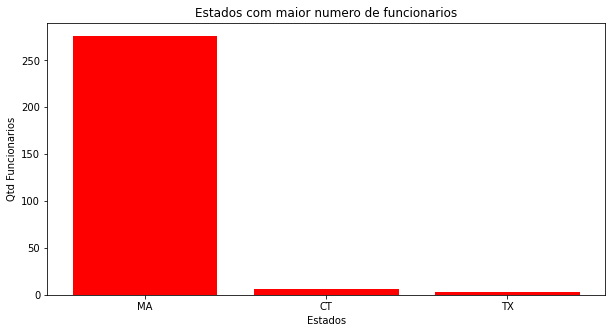

In [9]:
# grafico com metplotlib
fig = plt.figure(figsize=(10,5))
plt.title('Estados com maior numero de funcionarios')
plt.ylabel('Qtd Funcionarios')
plt.xlabel('Estados')
plt.bar(estado_qtd['State'], estado_qtd['qtd'], color='red')
fig.show()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

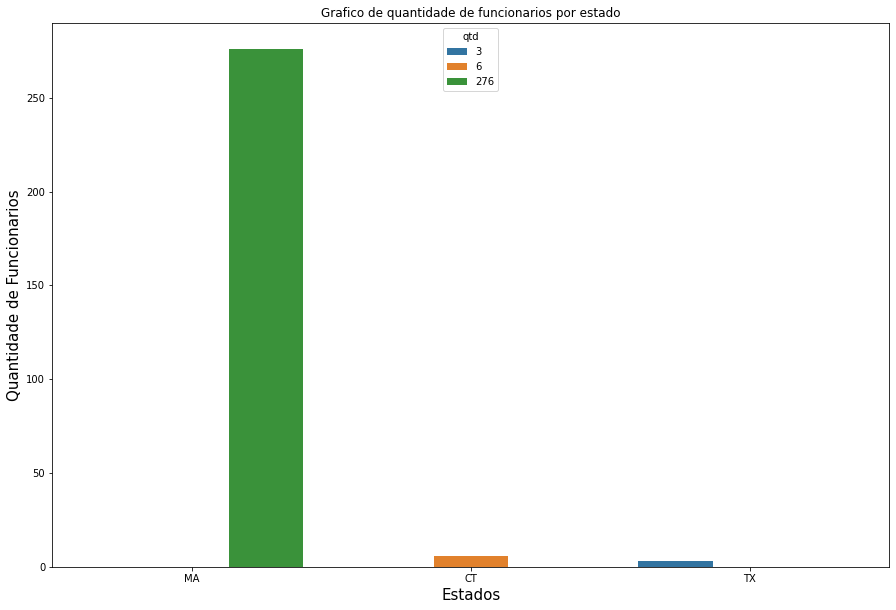

In [27]:
# grafico com seaborn sns
fig = plt.figure(figsize=(15,10))
sns.barplot(data=estado_qtd, x='State', y='qtd', hue='qtd', ).set_title('Grafico de quantidade de funcionarios por estado')
plt.xlabel('Estados',fontsize=15)
plt.ylabel('Quantidade de Funcionarios', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [34]:
# Grafico de barras com plotly

fig = go.Figure()

fig.add_trace(go.Bar(
    x=estado_qtd['State'],
    y=estado_qtd['qtd'],
    marker_color='Blue',
    name='Grafico de Barras Estado/Funcionario'
))
fig.update_layout(xaxis=dict(title='Sigla dos Estados', titlefont_size=15, tickfont_size=10))
fig.update_layout(yaxis=dict(title='Quantidade de funcionarios', titlefont_size=15,tickfont_size=10))

## 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)

In [46]:
fig = px.histogram(hrd['ManagerName'], nbins=5)
fig.show()

In [49]:
gerente_qts_funcionario = hrd.filter(items=('ManagerName','Employee_Name'))
grupo_manager = gerente_qts_funcionario .groupby(['ManagerName']).size().reset_index(name='qtd')
grupo_manager

,ManagerName,qtd
0,Alex Sweetwater,9
1,Amy Dunn,21
2,Board of Directors,2
3,Brandon R. LeBlanc,7
4,Brannon Miller,22
5,Brian Champaigne,8
6,David Stanley,21
7,Debra Houlihan,3
8,Elijiah Gray,22
9,Eric Dougall,4


## 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)

In [82]:
df_hired = hrd.dropna(subset=['DateofTermination'])

df_hired




,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


## 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?

## 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)

In [86]:
marital = hrd.groupby(['MaritalDesc']).sum('Sex').reset_index()
marital.T

,0,1,2,3,4
MaritalDesc,Divorced,Married,Separated,Single,Widowed
EmpID,304442,1260001,121522,1391374,81177
MarriedID,0,124,0,0,0
MaritalStatusID,60,124,36,0,32
GenderID,14,52,3,62,4
EmpStatusID,94,320,21,286,23
DeptID,139,552,60,644,39
PerfScoreID,93,364,36,408,25
FromDiversityJobFairID,5,11,2,11,0
Salary,1932820,8658637,755212,9597203,521561


## 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?

## 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position

In [ ]:
df.groupby('Department', as_index = False).agg({'Salary':'mean'})

,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


In [ ]:
df.groupby('RaceDesc', as_index = False).agg({'Salary':'mean'})

,RaceDesc,Salary
0,American Indian or Alaska Native,65806.000000
1,Asian,68521.206897
2,Black or African American,74431.025000
3,Hispanic,83667.000000
4,Two or more races,59998.181818
5,White,67287.545455


In [ ]:
df.groupby('Position', as_index = False).agg({'Salary':'mean'})

,Position,Salary
0,Accountant I,63507.666667
1,Administrative Assistant,52280.000000
2,Area Sales Manager,64932.555556
3,BI Developer,95465.000000
4,BI Director,110929.000000
5,CIO,220450.000000
6,Data Analyst,89932.571429
7,Data Analyst,88527.000000
8,Data Architect,150290.000000
9,Database Administrator,108499.600000


## 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?